In [2]:
import pandas as pd

In [3]:
# Load the Dataset
df = pd.read_csv('Lung Cancer.csv')

In [4]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [5]:
# Convert Data Columns
df['diagnosis_date'] = pd.to_datetime(df['diagnosis_date'], errors='coerce')
df['end_treatment_date'] = pd.to_datetime(df['end_treatment_date'], errors='coerce')

In [6]:
# Display General Information
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330449 entries, 0 to 330448
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  330449 non-null  int64         
 1   age                 330449 non-null  float64       
 2   gender              330449 non-null  object        
 3   country             330448 non-null  object        
 4   diagnosis_date      330448 non-null  datetime64[ns]
 5   cancer_stage        330448 non-null  object        
 6   family_history      330448 non-null  object        
 7   smoking_status      330448 non-null  object        
 8   bmi                 330448 non-null  float64       
 9   cholesterol_level   330448 non-null  float64       
 10  hypertension        330448 non-null  float64       
 11  asthma              330448 non-null  float64       
 12  cirrhosis           330448 non-null  float64       
 13  other_cancer        330448 no

In [7]:
# Summary Statistics
print(df.describe())

                  id            age                 diagnosis_date  \
count  330449.000000  330449.000000                         330448   
mean   165225.000000      55.009865  2019-06-03 06:24:09.029196544   
min         1.000000       7.000000            2014-06-02 00:00:00   
25%     82613.000000      48.000000            2016-12-02 00:00:00   
50%    165225.000000      55.000000            2019-06-06 00:00:00   
75%    247837.000000      62.000000            2021-12-02 00:00:00   
max    330449.000000     101.000000            2024-05-30 00:00:00   
std     95392.553889       9.996022                            NaN   

                 bmi  cholesterol_level   hypertension         asthma  \
count  330448.000000      330448.000000  330448.000000  330448.000000   
mean       30.511588         233.722510       0.750505       0.469908   
min        16.000000         150.000000       0.000000       0.000000   
25%        23.300000         196.000000       1.000000       0.000000   
50% 

In [8]:
# Check For Missing Values
print(df.isnull().sum())

id                    0
age                   0
gender                0
country               1
diagnosis_date        1
cancer_stage          1
family_history        1
smoking_status        1
bmi                   1
cholesterol_level     1
hypertension          1
asthma                1
cirrhosis             1
other_cancer          1
treatment_type        1
end_treatment_date    1
survived              1
dtype: int64


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

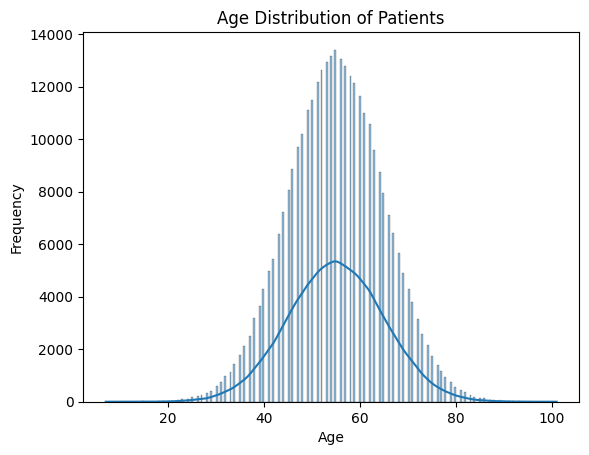

In [10]:
# Age Distribution
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

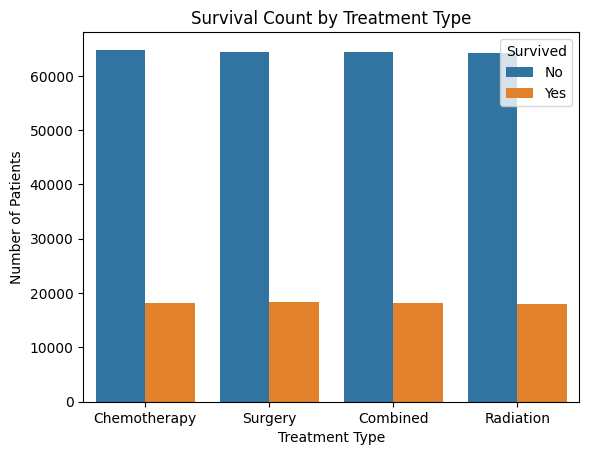

In [11]:
# Survival Count by Treatment Type
sns.countplot(x='treatment_type', hue='survived', data=df)
plt.title('Survival Count by Treatment Type')
plt.xlabel('Treatment Type')
plt.ylabel('Number of Patients')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

In [12]:
df.to_csv("cleaned_lung_cancer.csv", index=False)

Does The Type of Treatment Affect The Patient's Survival Rate?

In [13]:
treatment_survival = df.groupby('treatment_type')['survived'].mean().sort_values(ascending=False)
print(treatment_survival)

treatment_type
Surgery         0.222158
Radiation       0.219702
Combined        0.219363
Chemotherapy    0.219326
Name: survived, dtype: float64


Do Patients with a Family History of Cancer Have Different Survival Outcomes?

In [14]:
family_survival=df.groupby('family_history')['survived'].mean()
print(family_survival)

family_history
No     0.220777
Yes    0.219498
Name: survived, dtype: float64


Is There a Difference in Survival Rate Between Smokers and Non-smokers?

In [15]:
smoking_survival=df.groupby('smoking_status')['survived'].mean()
print(smoking_survival)

smoking_status
Current Smoker    0.221232
Former Smoker     0.219924
Never Smoked      0.221486
Passive Smoker    0.217924
Name: survived, dtype: float64


How Does Cancer Stage at Diagnosis Relate to Survival Rate?

In [16]:
stage_survival = df.groupby('cancer_stage')['survived'].mean()
print(stage_survival)

cancer_stage
Stage I      0.217699
Stage II     0.219998
Stage III    0.221587
Stage IV     0.221251
Name: survived, dtype: float64


Is Age Determining Factor in Patient Survival?

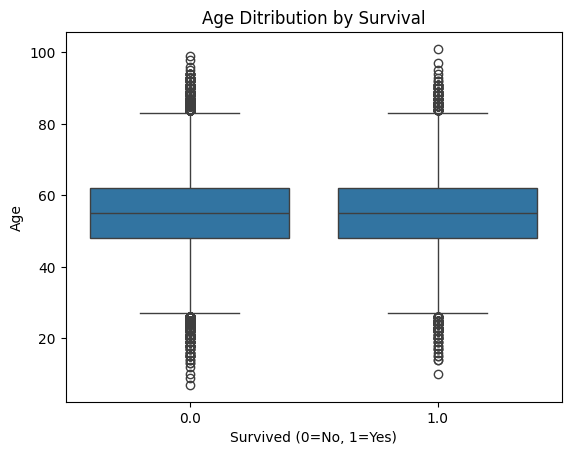

In [17]:
sns.boxplot(x='survived', y='age', data=df)
plt.title('Age Ditribution by Survival')
plt.xlabel('Survived (0=No, 1=Yes)')
plt.ylabel('Age')
plt.show()

Do comorbid conditions (such as hypertension, asthma, cirrhosis) influence survival outcomes?

In [18]:
comorbidities = ['hypertension', 'asthma', 'cirrhosis', 'other_cancer']
for condition in comorbidities:
  print(f"{condition}:")
  print(df.groupby(condition)['survived'].mean())

hypertension:
hypertension
0.0    0.221141
1.0    0.219804
Name: survived, dtype: float64
asthma:
asthma
0.0    0.221102
1.0    0.219049
Name: survived, dtype: float64
cirrhosis:
cirrhosis
0.0    0.219569
1.0    0.222091
Name: survived, dtype: float64
other_cancer:
other_cancer
0.0    0.220169
1.0    0.219809
Name: survived, dtype: float64


Which BMI Category Has the Highest Survival Rate?

In [19]:
def bmi_category(bmi):
  if bmi < 18.5:
    return 'Underweight'
  elif bmi < 25:
    return 'Normal'
  elif bmi < 30:
    return 'Overweight'
  else:
    return 'Obese'
df['bmi_group'] = df['bmi'].apply(bmi_category)

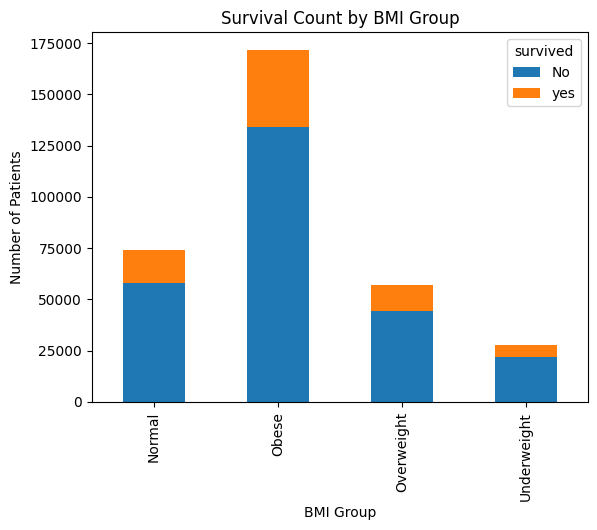

In [20]:
bmi_survival = df.groupby(['bmi_group', 'survived']).size().unstack().fillna(0)
bmi_survival.plot(kind='bar', stacked=True)
plt.title('Survival Count by BMI Group')
plt.xlabel('BMI Group')
plt.ylabel('Number of Patients')
plt.legend(title='survived', labels=['No','yes'])
plt.show()